## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
primary_merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
timepoints = primary_merge_data["Timepoint"].value_counts()
results_count = primary_merge_data["Mouse ID"].count()
mouse_count = primary_merge_data["Mouse ID"].nunique()

In [2]:
# Checking the number of mice in the DataFrame.
print(results_count)
print(mouse_count)

1893
249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_mouse = primary_merge_data.drop_duplicates(subset=('Mouse ID', 'Timepoint'), keep='last')
group_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
group_mice = primary_merge_data.drop_duplicates(subset='Mouse ID', keep='last')
 
group_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
print("Total number of mice in clean DataFrame", group_mice['Mouse ID'].count())

Total number of mice in clean DataFrame 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol = group_mice.groupby("Drug Regimen")
avg_vol = round(tumor_vol["Tumor Volume (mm3)"].mean(),2)
med_vol = round(tumor_vol["Tumor Volume (mm3)"].median(),2)
var_vol = round(tumor_vol["Tumor Volume (mm3)"].var(),2)
stnd_dev = round(tumor_vol["Tumor Volume (mm3)"].std(),2)
sem_vol = round(tumor_vol["Tumor Volume (mm3)"].sem(),2)

sum_stat = pd.DataFrame({
    "Average Volume" : avg_vol, 
    "Median Volume" : med_vol,
    "Volume Variance" : var_vol, 
    "Volume Std Dev" : stnd_dev, 
    "Volume SEM" : sem_vol
})


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stat

,Average Volume,Median Volume,Volume Variance,Volume Std Dev,Volume SEM
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar Plots

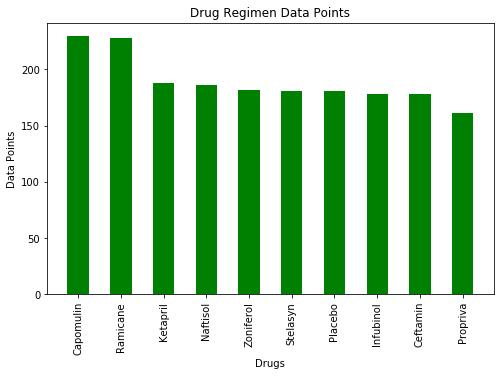

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
combined_bar_data = primary_merge_data.groupby("Drug Regimen")

pandas_bar_data = combined_bar_data["Timepoint"].count().sort_values(ascending = False)
x_axis = np.arange(len(pandas_bar_data))
tick = [value for value in x_axis]
plt.figure(figsize=(8,5))
plt.bar(x_axis, pandas_bar_data, color="green",width = .5)
plt.xticks(tick, pandas_bar_data.index, rotation="vertical")
plt.title("Drug Regimen Data Points")
plt.xlabel("Drugs")
plt.ylabel("Data Points")
plt.show()

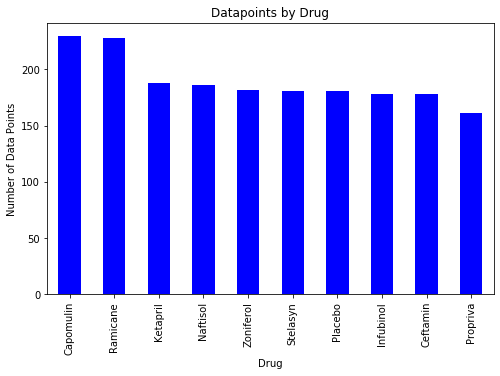

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_grouped = primary_merge_data.groupby("Drug Regimen")


bar_chart_data = drug_grouped["Timepoint"].count().sort_values(ascending = False)
bar_chart = bar_chart_data.plot(kind = "bar", color = "blue", figsize = (8,5))
bar_chart.set_title("Datapoints by Drug")
bar_chart.set_xlabel("Drug")
bar_chart.set_ylabel("Number of Data Points")
plt.show()

## Pie Plots

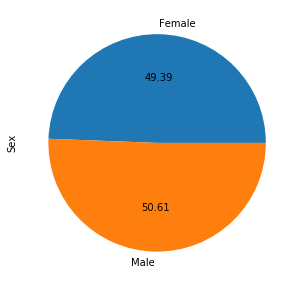

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = primary_merge_data.groupby("Sex")
pie_data = gender_group['Sex'].count()
pie_chart = pie_data.plot.pie(subplots=True, autopct='%.2f', figsize=(8,5))


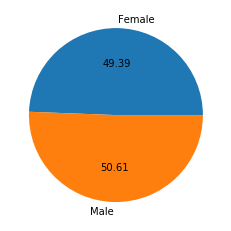

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = primary_merge_data.groupby("Sex")

pie_data = gender_group['Sex'].count()
labels =["Female", "Male"]
plt.pie(pie_data, labels=labels, autopct='%.2f')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

final_tumor_vol = group_mice.drop_duplicates(subset = ("Mouse ID"), keep = "last")
final_tumor_by_drug = final_tumor_vol[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_size_Capomulin = final_tumor_by_drug.loc[final_tumor_by_drug["Drug Regimen"] == "Capomulin"]
final_tumor_size_Ramicane = final_tumor_by_drug.loc[final_tumor_by_drug["Drug Regimen"] == "Ramicane"]
final_tumor_size_Infubinol = final_tumor_by_drug.loc[final_tumor_by_drug["Drug Regimen"] == "Infubinol"]
final_tumor_size_Ceftamin = final_tumor_by_drug.loc[final_tumor_by_drug["Drug Regimen"] == "Ceftamin"]



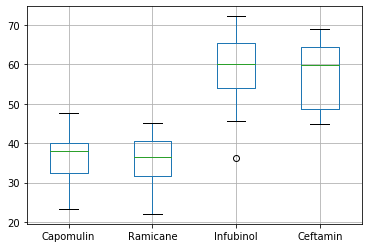

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_df = pd.DataFrame({"Capomulin" : final_tumor_size_Capomulin["Tumor Volume (mm3)"],
                            "Ramicane" : final_tumor_size_Ramicane["Tumor Volume (mm3)"],
                           "Infubinol" : final_tumor_size_Infubinol["Tumor Volume (mm3)"],
                        "Ceftamin" : final_tumor_size_Ceftamin["Tumor Volume (mm3)"]})
box_plot_df.boxplot()
plt.show()

## Line and Scatter Plots

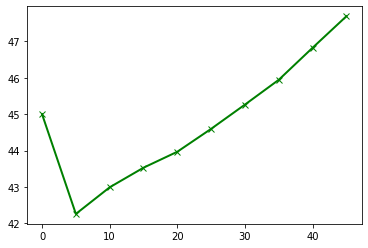

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = group_mouse.loc[group_mouse["Mouse ID"] == "i557"]
timepoint = capomulin["Timepoint"]
capomulin_vol = capomulin["Tumor Volume (mm3)"]
plt.plot(timepoint, capomulin_vol, color = "green", marker = "x", markerfacecolor = "blue", linewidth = 2)
plt.show()

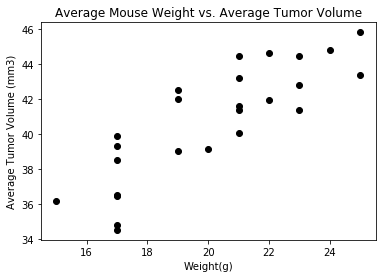

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_expiriments = group_mouse.loc[group_mouse["Drug Regimen"] == "Capomulin"]

capomulin_expiriment_avgs = capomulin_expiriments.groupby("Mouse ID").mean()
avg_weight = capomulin_expiriment_avgs["Weight (g)"]
avg_tumor_volume = capomulin_expiriment_avgs["Tumor Volume (mm3)"]
plt.scatter(avg_weight, avg_tumor_volume, facecolor = "black")
plt.title("Average Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

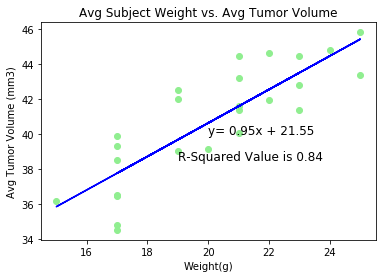

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, y_int, r_value, p_value, std_err = st.linregress(avg_weight, avg_tumor_volume)
fit = avg_weight * slope  + y_int
equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))
r_square = "R-Squared Value is " + str(round(r_value,2))
plt.scatter(avg_weight, avg_tumor_volume, facecolor = "lightgreen")
plt.plot(avg_weight, fit, color = "blue")
plt.annotate(equation, (20, 40), color = "black", fontsize = 12)
plt.annotate(r_square, (19, 38.5), color = "black", fontsize = 12)
plt.title("Avg Subject Weight vs. Avg Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()
